# Кузьмичев Никита
## **Домашнее задание №2**

### Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.

##### **1. Загрузка данных и первичный осмотр**

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Магическая команда для отображения графиков прямо в ноутбуке
%matplotlib inline

In [2]:
# Загрузка датасета
df = pd.read_csv('S02-hw-dataset.csv')

Первичный осмотр данных

In [3]:
# Вывод первых строк
display(df.head())

# Информация о типах данных и заполненности
print("\033[1m"+"\n--- Информация ---"+"\033[0m")
df.info()

# Базовые описательные статистики
print("\033[1m"+"\n--- Статистики ---"+"\033[0m")
display(df.describe())

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



--- Информация ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

--- Статистики ---


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


ㅤ

##### **2. Пропуски, дубликаты и базовый контроль качества**

In [4]:
# Считаем долю пропусков в каждом столбце
print("\033[1m"+"Доля пропусков:"+"\033[0m")
print(df.isna().mean())

Доля пропусков:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [5]:
# Проверяем наличие полных дубликатов строк
duplicates_count = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

# Выведем сами дубликаты
if duplicates_count > 0:
    display(df[df.duplicated(keep=False)])

Количество полных дубликатов: 1


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


Поиск подозрительных значений (Контроль качества)

In [6]:
# Отрицательные покупки (количество не может быть минусовым)
suspicious_purchases = df[df['purchases'] < 0]
print("--- Отрицательные покупки ---")
display(suspicious_purchases)

# Нереалистичный возраст (например > 100 или слишком маленький для покупок)
suspicious_age = df[(df['age'] > 100) | (df['age'] < 10)]
print("\n--- Подозрительный возраст ---")
display(suspicious_age)

# Логическое противоречие: покупки есть, а выручка 0
suspicious_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print("\n--- Покупки есть, выручки нет ---")
display(suspicious_revenue)

--- Отрицательные покупки ---


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



--- Подозрительный возраст ---


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488



--- Покупки есть, выручки нет ---


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


### Вывод:

**Дубликаты:** Обнаружена одна полностью дублирующаяся строка с **user_id = 10**.

**Пропуски:** Есть пропуски в столбце age у **user_id = 5 и 13**.

**Аномалии:**

    purchases: Отрицательное значение -1 у **user_id 6**.
    
    age: Найден пользователь с возрастом 120 лет (**user_id 6**) и ребенок 5 лет (**user_id 21**).
    
    revenue: Странная ситуация у **user_id 11** (4 покупки, но 0 выручки).

ㅤ

##### **3. Базовый EDA: группировки, агрегаты и частоты**

In [7]:
# Частоты для категориальной переменной 'country'
print("Распределение пользователей по странам:")
print(df['country'].value_counts())

Распределение пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [8]:
# Средний чек и суммарная выручка по странам (группировка)
country_stats = df.groupby('country')[['revenue', 'purchases']].agg(['mean', 'sum'])
display(country_stats)

revenue        purchases    
                mean    sum      mean sum
country                                  
CN       1054.000000   2108  4.500000   9
DE       1445.500000   8673  6.500000  39
FR        675.916667   8111  4.250000  51
RU        790.076923  10271  4.769231  62
US        557.375000   4459  4.625000  37

### Наблюдения:

Больше всего пользователей из **России (RU)** и **Франции (FR)**.

**США (US)** показывают неплохую активность, но нужно проверить данные на корректность из-за нулевой выручки в одной строке.

**Германия (DE)** имеет высокие показатели по средней выручке (если судить по mean).

ㅤ

##### **4. Визуализация данных в Matplotlib**

###### **Гистограмма**

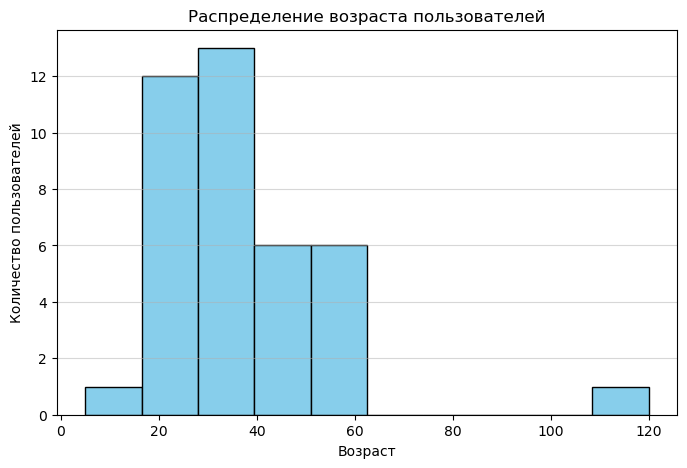

In [9]:
plt.figure(figsize=(8, 5))
# Строим гистограмму распределения возраста
# Используем dropna(), чтобы исключить пустые значения возраста при построении
plt.hist(df['age'].dropna(), bins=10, color='skyblue', edgecolor='black')

plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

###### **Boxplot**

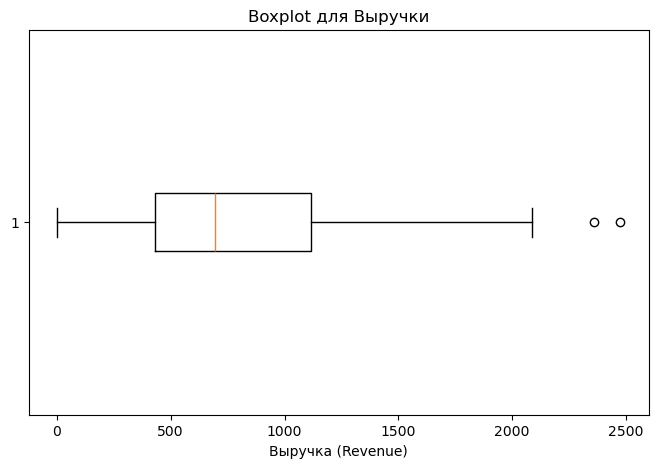

In [10]:
plt.figure(figsize=(8, 5))
# Строим боксплот для выручки (revenue)
plt.boxplot(df['revenue'], vert=False)

plt.title('Boxplot для Выручки')
plt.xlabel('Выручка (Revenue)')
plt.show()

###### **Scatter Plot**

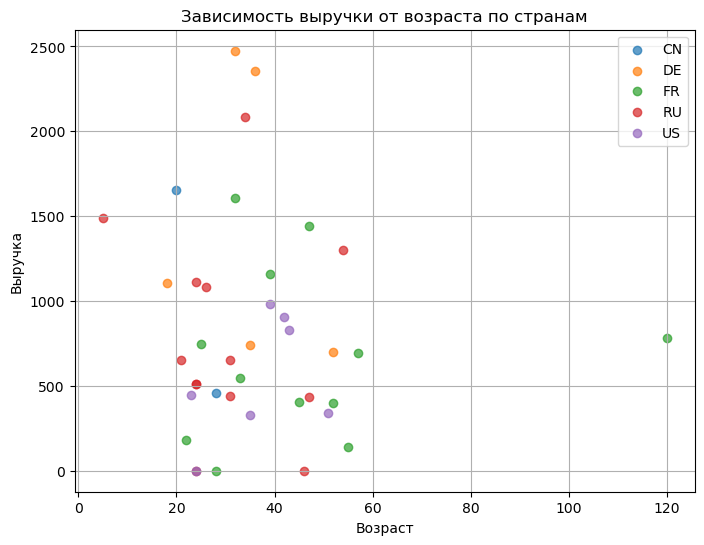

In [11]:
plt.figure(figsize=(8, 6))
# Диаграмма рассеяния: Возраст vs Выручка
# Добавим цвет в зависимости от страны
groups = df.groupby('country')
for name, group in groups:
    plt.scatter(group['age'], group['revenue'], label=name, alpha=0.7)

plt.title('Зависимость выручки от возраста по странам')
plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.legend()
plt.grid(True)

# Сохраним этот график
plt.savefig(fname = 'figures/scatter_age_revenue.png')
plt.show()